## Reproduce "the Supervised Learning Steps with A Simple Classification Task"

In the class, we went through the basic flow of supervised learning. In this assignment, you need to reproduce the notebook with a new data set.

Please fill in your code in the empty cells according to instructions.

### Import required modules 

If you see import exceptions, try to reinstall the library in the anaconda command prompt with:

pip install 'the library name here'

In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV,SGDClassifier,ElasticNetCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as AUC

import seaborn as sns

%matplotlib inline

### Load data file into pandas Data Frame.

Please download the data file (churn_train_complete.csv) from canvas into your local drive.

Please name your dataframe as **churn**

In [2]:
churn=pd.read_csv('..\\data\\churn_train_complete.csv')

### Preview the first **Ten** row of the origninal dataset 

In [3]:
churn.head(10)

,msno,is_churn,logs_count,city,bd,gender,registered_via,registration_init_time,trans_count,payment_method_id,...,is_cancel,cancel_count,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,26.0,18.0,36.0,2.0,9.0,20050406.0,2.0,38.0,...,0.0,0.0,20170208.0,1.0,0.0,0.0,0.0,1.0,2.0,311.402
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,521.0,10.0,38.0,1.0,9.0,20050407.0,22.0,39.0,...,0.0,1.0,20170215.0,0.0,0.0,0.0,0.0,3.0,3.0,796.916
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,237.0,11.0,27.0,2.0,9.0,20051016.0,10.0,39.0,...,1.0,1.0,20170131.0,2.0,0.0,0.0,1.0,1.0,4.0,451.186
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,735.0,13.0,23.0,2.0,9.0,20051102.0,2.0,38.0,...,0.0,0.0,20170221.0,13.0,2.0,2.0,4.0,17.0,35.0,5194.345
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,758.0,3.0,27.0,1.0,9.0,20051228.0,8.0,38.0,...,0.0,0.0,20170228.0,0.0,0.0,0.0,1.0,2.0,3.0,751.381
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,613.0,6.0,23.0,2.0,9.0,20060331.0,21.0,33.0,...,0.0,0.0,20170228.0,2.0,0.0,0.0,0.0,0.0,2.0,42.109
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,231.0,13.0,29.0,2.0,9.0,20060406.0,11.0,36.0,...,0.0,0.0,20170209.0,0.0,0.0,0.0,0.0,1.0,1.0,234.161
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,656.0,11.0,22.0,1.0,9.0,20060425.0,22.0,38.0,...,0.0,1.0,20170225.0,0.0,0.0,0.0,0.0,7.0,7.0,1653.000
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,690.0,18.0,22.0,2.0,9.0,20060826.0,21.0,38.0,...,0.0,0.0,20170228.0,5.0,1.0,0.0,1.0,6.0,5.0,2127.618
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,52.0,11.0,30.0,2.0,9.0,20061123.0,5.0,38.0,...,0.0,0.0,20170123.0,0.0,0.0,0.0,0.0,5.0,5.0,1192.000


### List columns of the dataset 

Use dataframe.columns

In [5]:
churn.columns

Index(['msno', 'is_churn', 'logs_count', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'trans_count',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'is_cancel', 'cancel_count',
       'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs'],
      dtype='object')

## Discription of the data

The dataset contains about 1 million subscribers to an online music provider.

For a subscription business, accurately predicting churn (**when a subscriber discontinue a service**) is critical to long-term success. Even slight variations in churn can drastically affect profits.

The goal of the task is to predict who will churn.

A brief description of the data columns:
+ 'msno': the unique identification of a subscriber
+ 'is_churn': the label or the target, indicating whether a subscriber has churned,is_churn = 1 means churn,is_churn = 0 means renewal.
+ 'logs_count': number of logs for listening behaviors of a subscriber
+ 'city': the city of a subscriber choose when registrated
+ 'bd': age
+ 'gender': gender
+ 'registered_via': registration method
+ 'registration_init_time': registration date
+ 'trans_count': number of transactions a subscriber completed
+ 'payment_method_id': payment_method
+ 'payment_plan_days': days in a payment_plan
+ 'plan_list_price': price
+ 'actual_amount_paid': actual_amount_paid
+ 'is_auto_renew': whether the plan is auto renewed
+ 'is_cancel': whether or not the user canceled the membership in this transaction.
+ 'cancel_count': how many times the user has cancelled the service in the past.
+ 'date': last recorded log date
+ 'num_25': # of songs played less than 25% of the song length in the last activity
+ 'num_50': # of songs played between 25% to 50% of the song length  in the last activity
+ 'num_75': # of songs played between 50% to 75% of of the song length in the last activity
+ 'num_985': # of songs played between 75% to 98.5% of the song length in the last activity
+ 'num_100': # of songs played over 98.5% of the song length in the last activity
+ 'num_unq': # of unique songs played in the last activity
+ 'total_secs': total seconds played in the last activity

### Examing the data

Get basic statistics of variables, using dataframe.describe()

In [6]:
churn.describe()

,is_churn,logs_count,city,bd,gender,registered_via,registration_init_time,trans_count,payment_method_id,payment_plan_days,...,is_cancel,cancel_count,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,992931.000000,869926.000000,876143.000000,876143.000000,396057.000000,876143.000000,8.761430e+05,990834.000000,990834.000000,990834.000000,...,990834.00000,990834.000000,8.699260e+05,869926.000000,869926.000000,869926.000000,869926.000000,869926.000000,869926.000000,8.699260e+05
mean,0.063923,282.261706,5.954029,13.559955,1.474318,6.911001,2.013226e+07,15.169764,38.955888,34.749417,...,0.01335,0.248182,2.016926e+07,5.002966,1.227091,0.748937,0.836488,21.911073,22.154364,5.761275e+03
std,0.244616,224.093097,6.443070,20.153530,0.499341,1.905375,2.973735e+04,8.192269,3.576010,36.936100,...,0.11477,0.550749,3.339484e+03,11.390805,3.337881,1.689296,2.309681,36.174219,27.484884,8.679646e+03
min,0.000000,1.000000,1.000000,-3152.000000,1.000000,3.000000,2.004033e+07,1.000000,3.000000,0.000000,...,0.00000,0.000000,2.015010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e-03
25%,0.000000,83.000000,1.000000,0.000000,1.000000,7.000000,2.012021e+07,8.000000,38.000000,30.000000,...,0.00000,0.000000,2.017022e+07,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,1.019953e+03
50%,0.000000,234.000000,1.000000,0.000000,1.000000,7.000000,2.014051e+07,16.000000,41.000000,30.000000,...,0.00000,0.000000,2.017023e+07,2.000000,0.000000,0.000000,0.000000,11.000000,13.000000,2.951962e+03
75%,0.000000,453.000000,13.000000,27.000000,2.000000,9.000000,2.016011e+07,22.000000,41.000000,30.000000,...,0.00000,0.000000,2.017023e+07,5.000000,1.000000,1.000000,1.000000,27.000000,29.000000,7.136613e+03
max,1.000000,790.000000,22.000000,2015.000000,2.000000,13.000000,2.017033e+07,71.000000,41.000000,450.000000,...,1.00000,20.000000,2.017023e+07,1153.000000,435.000000,216.000000,693.000000,11170.000000,1131.000000,2.372163e+06


#### What did  you notice? (Type below)

- gender one appears to be the predominant listener. Based off the mean of the data being 1.4743
- is_churn: based off the mean value it appears that the majority of customers in the data have renewed.
- The data type could be changed on some columns. Such as registration_init_time could be a date.
- is_cancel based off the mean not many people have canceled during this transaction.
- bd some of the people ages were entered incorrectly because the min is -3,152 and the max is 2015.
- City appears to be a key for the city name.

### Checking number of missing values for each column

Use dataframe.isnull().sum()

In [7]:
churn.isnull().sum()

msno                           0
is_churn                       0
logs_count                123005
city                      116788
bd                        116788
gender                    596874
registered_via            116788
registration_init_time    116788
trans_count                 2097
payment_method_id           2097
payment_plan_days           2097
plan_list_price             2097
actual_amount_paid          2097
is_auto_renew               2097
is_cancel                   2097
cancel_count                2097
date                      123005
num_25                    123005
num_50                    123005
num_75                    123005
num_985                   123005
num_100                   123005
num_unq                   123005
total_secs                123005
dtype: int64

### For now, we just fill all missing values with 0, using the code below.

In [4]:
churn=churn.fillna(0)

### Heatmap of the correlations among variables

You can use the following code to create the heatmap, and you need seaborn library, if you have not intalled the library, you can go to command line to

pip install seaborn

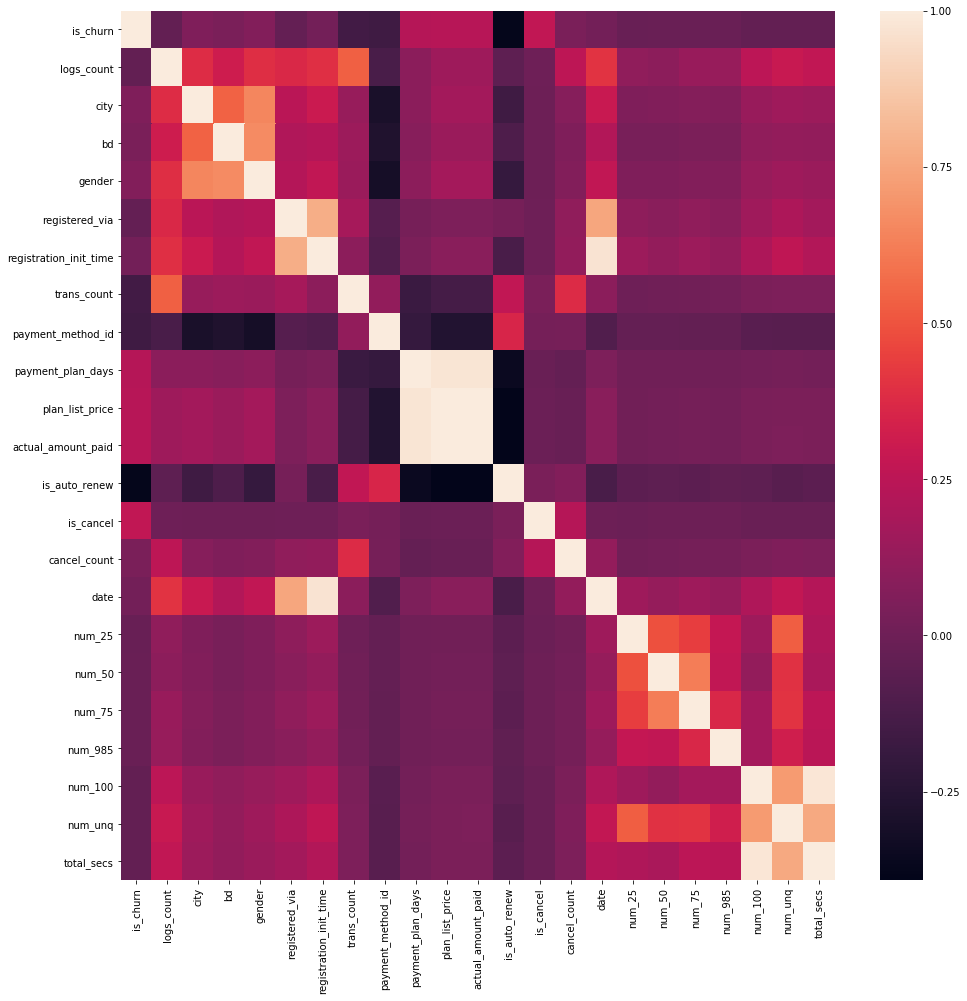

In [5]:
# Calculate correlations of numberical columns in the dataframe
corr = churn.corr()
 
# Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr)

### Histogram for numerical columns

C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


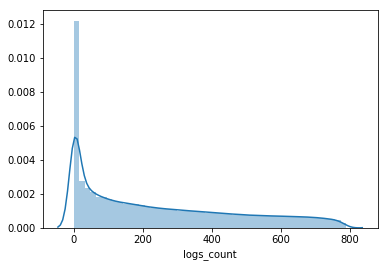

In [6]:
sns.distplot(churn.logs_count)

In [7]:
n_col=['logs_count',  'bd', 'trans_count',
       'payment_plan_days', 'plan_list_price',
       'actual_amount_paid',   'cancel_count',
        'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs']# numerical columns
c_col=['city','gender','registered_via','payment_method_id', 'is_auto_renew','is_cancel'] #categorical columns



C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

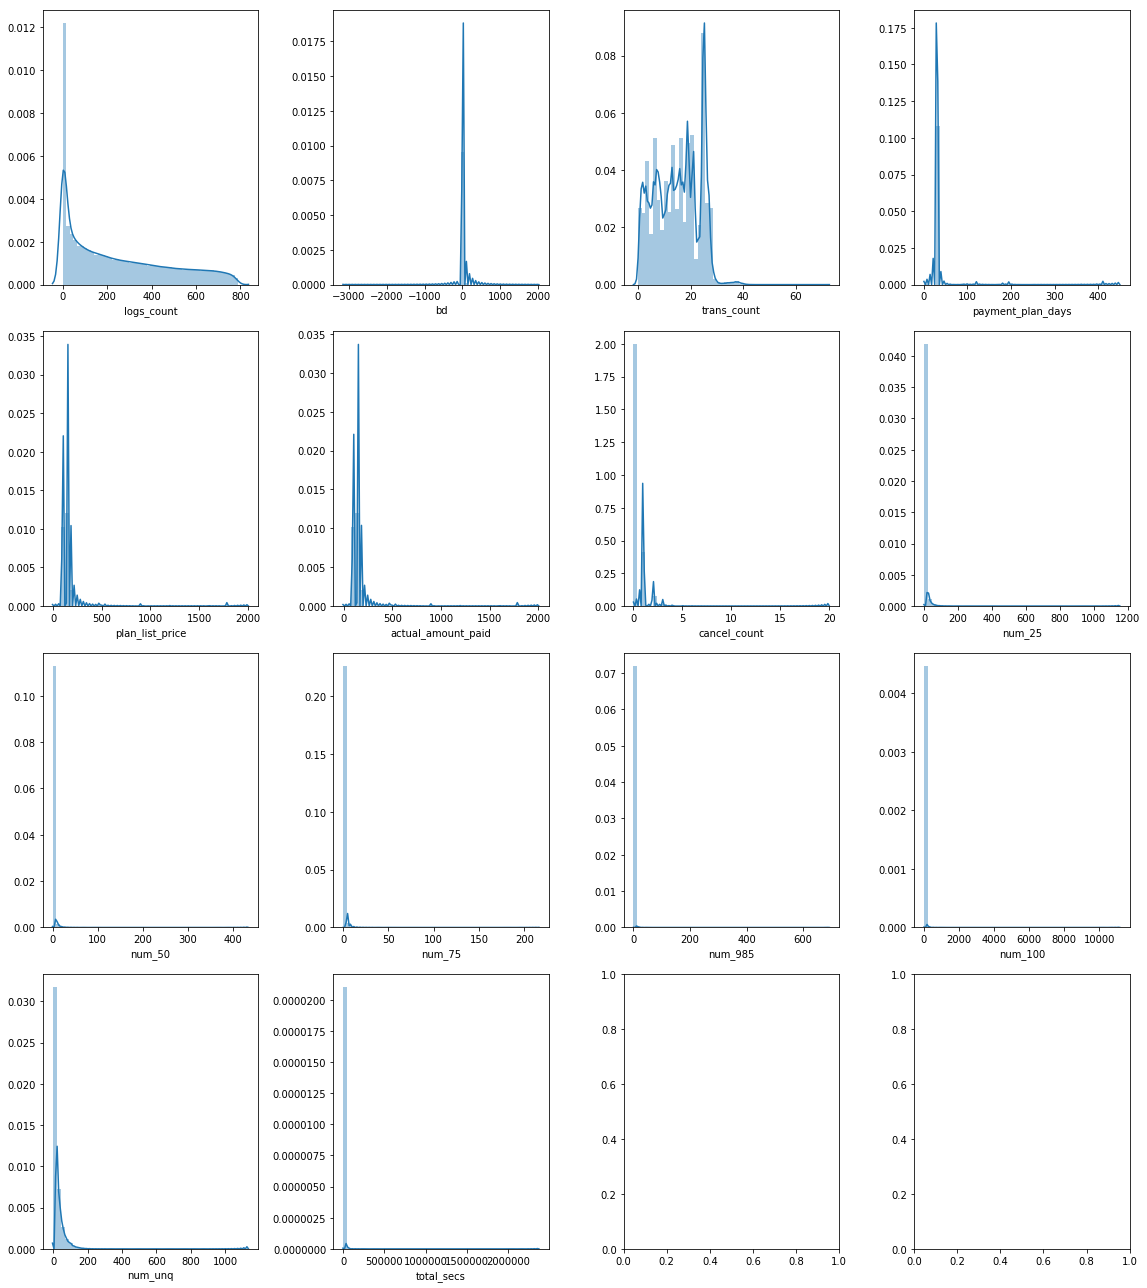

In [8]:
fig, axs = plt.subplots(4, 4, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(len(n_col)):
    sns.distplot(churn[n_col[i]],ax=axslist[i])
fig.tight_layout()  

### What did you notice? (type below)

- logs_count: Spikes at 0 probably because we replaced null values with 0. Then it tapers off pretty gently up to 800.
- The first thing I notice that because of our outliers in bd age has a huge spread with the majority of the ages centered around zero. This is probably because we had a lot of null values for age and then we just assigned zero to every null value.
- trans_count: A large amount of customers have completed around 25 to 30 transactions, but there is a pretty even spread from 0 to 25.
- payment_plan_days: Seems to have the largest grouping around 30 days give or take a little.
- plan_list_price: Seems to have a large grouping around 100 but that could be up or down the graph is not that detailed.
- actual_amount_paid: The plan_list_price and actual_amount_paid seem to be equal.

### Frequencies of categorical columns

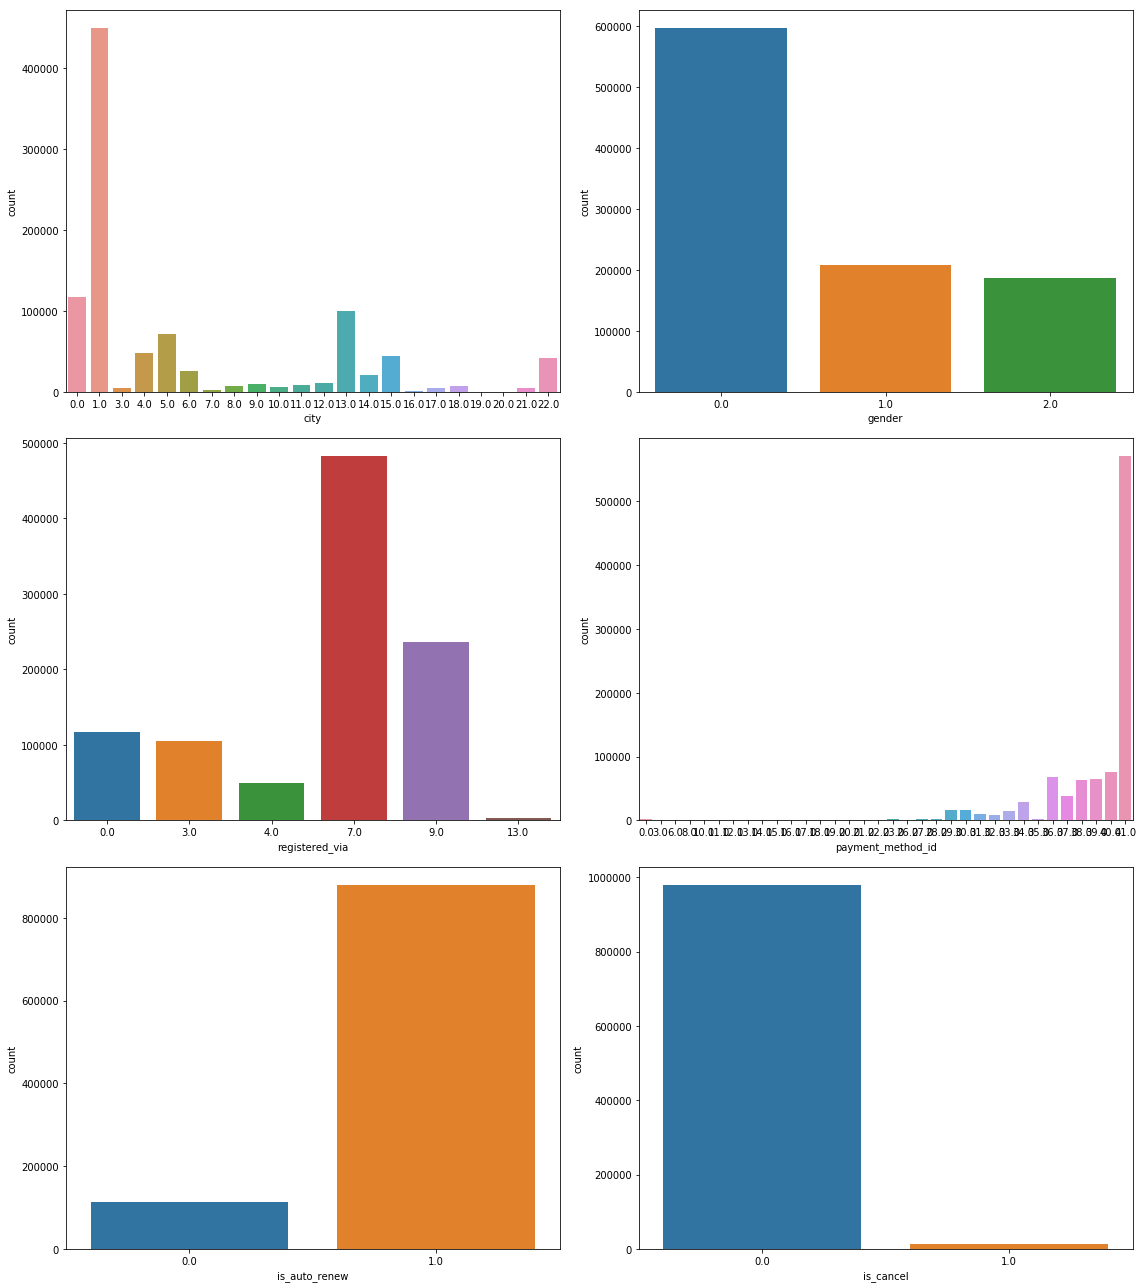

In [9]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.countplot(churn[c_col[i]],ax=axslist[i])
fig.tight_layout()    

### What did you notice? (type below)

- The majority of customers are in city 1 and then the next two highest values are 13 and 0. 0 again could be from the null values.
- There are slightly more customers from gender 1 than gender 2 and a large amount who did not specify.
- THe majority of people registered through registration method 7.
- The x values are jumbled in mine but on my end the majority of people used the final payment method id.
- is_auto_renew: I am guessing the 1 means they are on auto_renew so the majority of people are on this plan.
- is_cancel: It appears only a small amount canceled this transaction period.


### Shape of the input data set

In [11]:
churn.shape

(992931, 24)

### Check the distribution of label (is_churn)

Use dataframe['label column name'].value_counts()

In [12]:
churn['is_churn'].value_counts()

0    929460
1     63471
Name: is_churn, dtype: int64

### Use countplot of seaborn

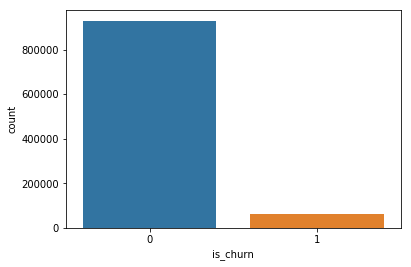

In [13]:
sns.countplot(churn.is_churn)

### Create train-test split

You need to create a X feature data, and a y label data.
Please print the shapes of the origninal, X, and y data.

Note: do not use msno the id column

In [21]:
X= churn.iloc[:, 2:]
y= churn.iloc[:, 1]
print(X.shape)
print(y.shape)

(992931, 22)
(992931,)


## Split the data into train/test datasets.

train_test_split(X,y,train_size=0.8) split X, y into X_train,X_test,y_train,y_test, by default the split is 75% to 25% for train to test, but you can change the rate with train_size, **here Please set 60% as train, and 40% as test.**

**One setting we did not talk about in the class is the 'stratify' option, if you set 'stratify=y', if keeps the proportion of the values of the label in both train and test datasets as in original dataset.**

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.6, random_state=0,stratify=y)
print('The X_train dataset shape is: ', X_train.shape)
print('The y_train dataset shape is: ', y_train.shape)
print('The X_test dataset shape is: ', X_test.shape)
print('The y_test dataset shape is: ', y_test.shape)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


The X_train dataset shape is:  (595758, 22)
The y_train dataset shape is:  (595758,)
The X_test dataset shape is:  (397173, 22)
The y_test dataset shape is:  (397173,)


## Check the proportion of churned and not churned subscribers in the original, train, and test datasets.

In [23]:
print('The original not_churn to churn ration is {0:.2%}'.format(churn['is_churn'].value_counts()[0]/churn.shape[0]))

The original not_churn to churn ration is 93.61%


In [24]:
print('The train not_churn to churn ration is {0:.2%}'.format(y_train.value_counts()[0]/y_train.shape[0]))

The train not_churn to churn ration is 93.61%


In [25]:
print('The test not_churn to churn ration is {0:.2%}'.format(y_test.value_counts()[0]/y_test.shape[0]))

The test not_churn to churn ration is 93.61%


### Choose only first 5,000 rows in all the datasets.

### Inspect the X_train,X_test,y_train,y_test data sets.

In [26]:
X_train=X_train[:5000]
y_train=y_train[:5000]
X_test=X_test[:5000]
y_test=y_test[:5000]

In [50]:
X_train.head(20)

,logs_count,city,bd,gender,registered_via,registration_init_time,trans_count,payment_method_id,payment_plan_days,plan_list_price,...,is_cancel,cancel_count,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
279918,3.0,1.0,0.0,0.0,7.0,20151003.0,16.0,41.0,30.0,99.0,...,0.0,0.0,20151103.0,1.0,2.0,0.0,0.0,0.0,3.0,185.102
570639,532.0,6.0,35.0,1.0,3.0,20111216.0,19.0,39.0,30.0,149.0,...,0.0,0.0,20170228.0,10.0,0.0,0.0,1.0,45.0,55.0,11115.370
821946,696.0,8.0,28.0,1.0,7.0,20111107.0,27.0,41.0,30.0,99.0,...,0.0,1.0,20170228.0,9.0,2.0,0.0,1.0,31.0,42.0,8344.352
229992,151.0,14.0,19.0,1.0,7.0,20160610.0,8.0,41.0,30.0,99.0,...,0.0,0.0,20170228.0,3.0,0.0,2.0,5.0,31.0,30.0,9720.650
52346,63.0,1.0,0.0,0.0,7.0,20160309.0,12.0,41.0,30.0,99.0,...,1.0,1.0,20170119.0,2.0,1.0,3.0,1.0,5.0,12.0,1892.151
5432,629.0,5.0,50.0,2.0,9.0,20050922.0,1.0,32.0,410.0,1788.0,...,0.0,0.0,20170131.0,8.0,0.0,1.0,0.0,9.0,17.0,2470.858
814901,127.0,6.0,37.0,2.0,9.0,20151110.0,10.0,39.0,30.0,149.0,...,0.0,0.0,20170225.0,6.0,2.0,0.0,0.0,65.0,57.0,16448.876
985786,6.0,1.0,0.0,0.0,7.0,20140615.0,1.0,41.0,30.0,99.0,...,0.0,0.0,20170208.0,7.0,1.0,1.0,2.0,0.0,5.0,745.794
659661,242.0,5.0,0.0,0.0,9.0,20120203.0,25.0,40.0,30.0,149.0,...,0.0,0.0,20170225.0,1.0,0.0,0.0,1.0,30.0,13.0,6915.486
799008,783.0,1.0,0.0,0.0,7.0,20120606.0,27.0,41.0,30.0,129.0,...,0.0,1.0,20170228.0,2.0,0.0,0.0,0.0,4.0,5.0,1021.313


In [51]:
y_train.head(20)

279918    0
570639    0
821946    0
229992    0
52346     1
5432      1
814901    0
985786    0
659661    0
799008    0
495132    0
918594    0
49790     1
323817    0
308120    0
975404    0
700372    0
54924     1
805664    0
686581    0
Name: is_churn, dtype: int64

In [52]:
X_test.head(20)

,logs_count,city,bd,gender,registered_via,registration_init_time,trans_count,payment_method_id,payment_plan_days,plan_list_price,...,is_cancel,cancel_count,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
742867,288.0,15.0,39.0,2.0,7.0,20110828.0,26.0,41.0,30.0,99.0,...,0.0,1.0,20170228.0,0.0,1.0,0.0,0.0,9.0,10.0,2145.375
908741,94.0,1.0,0.0,0.0,7.0,20160916.0,5.0,41.0,30.0,99.0,...,0.0,0.0,20170227.0,21.0,1.0,2.0,1.0,8.0,25.0,2700.679
389990,475.0,15.0,0.0,0.0,3.0,20130225.0,25.0,40.0,30.0,149.0,...,0.0,0.0,20170226.0,0.0,0.0,0.0,1.0,12.0,13.0,3144.223
18410,673.0,5.0,24.0,2.0,7.0,20140217.0,1.0,22.0,395.0,1599.0,...,0.0,0.0,20170228.0,8.0,4.0,2.0,4.0,7.0,13.0,3157.609
163716,102.0,1.0,0.0,0.0,7.0,20150907.0,17.0,41.0,30.0,99.0,...,0.0,0.0,20170228.0,6.0,0.0,0.0,0.0,33.0,33.0,7161.716
632489,530.0,13.0,0.0,0.0,9.0,20131019.0,3.0,32.0,195.0,894.0,...,0.0,0.0,20170228.0,7.0,5.0,2.0,5.0,16.0,26.0,5927.023
238907,43.0,1.0,0.0,0.0,7.0,20160204.0,12.0,41.0,30.0,99.0,...,0.0,0.0,20170227.0,14.0,0.0,1.0,2.0,1.0,17.0,1075.611
97885,594.0,1.0,0.0,0.0,7.0,20131123.0,25.0,41.0,30.0,149.0,...,0.0,0.0,20170228.0,2.0,4.0,0.0,0.0,24.0,10.0,6743.024
458121,449.0,4.0,39.0,2.0,9.0,20080907.0,25.0,37.0,30.0,149.0,...,0.0,0.0,20170228.0,1.0,1.0,3.0,2.0,44.0,10.0,12915.232
326526,48.0,1.0,0.0,0.0,7.0,20151019.0,16.0,41.0,30.0,99.0,...,0.0,0.0,20170228.0,2.0,0.0,0.0,1.0,1.0,4.0,400.407


In [53]:
y_test.head(20)

742867    0
908741    0
389990    0
18410     1
163716    0
632489    0
238907    0
97885     0
458121    0
326526    0
122299    0
587374    0
559416    0
446806    0
321027    0
580879    0
822892    0
933289    0
322499    0
129444    0
Name: is_churn, dtype: int64

### Check again the proportion of churned and not churned subscribers in the original, train, and test datasets.

It will be a little different, but for this demonstration, it is ok.

In [27]:
print('The train not_churn to churn ration is {0:.2%}'.format(y_train.value_counts()[0]/y_train.shape[0]))

print('The test not_churn to churn ration is {0:.2%}'.format(y_test.value_counts()[0]/y_test.shape[0]))

The train not_churn to churn ration is 93.44%
The test not_churn to churn ration is 93.38%


### Create classifier object

We first try multiclass logistic regression classifier.

In [28]:
clf = LogisticRegression()

### Train the classifier (fit the estimator) using the training data

In [29]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Find out the accuracy of training model

In [30]:
clf.score(X_train, y_train)

0.8364

### Estimate the accuracy of the classifier on future data, using the test data

In [31]:
clf.score(X_test, y_test)

0.8176

### Use another performance metrics, AUC


In [32]:
from sklearn.metrics import roc_auc_score as AUC

In [33]:
AUC(y_test,clf.predict(X_test))

0.4574298953242413

### Use the trained classifier model to classify (predict) new, previously unseen data

In [34]:
predicted_y=clf.predict(X_test)

In [36]:
print(predicted_y)

[0 0 0 ... 0 0 0]


In [37]:
for i in range(10):
    print(f'The actual value y is: {y_test.reset_index(drop=True)[i]}, and the predicted y is: {predicted_y[i]}')

The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 1, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0
The actual value y is: 0, and the predicted y is: 0


### Preview 1: Which model performs the best with default parameters?

Let's run a number of classification models with their default parameters.
There are:
+ K-Nearest Neighbors
+ Logistic Regression Classifier
+ Ridge Classifier
+ Lasso Classifier
+ SGD Classifier
+ ElasticNet Classifier
+ Support Vector Machine
+ Naive Bayes Multinomial Classifier
+ Decision Tree Classifier
+ Ensembles of Decision Trees (Random Forest classifier)

In [38]:
classifier_names=['K-Nearest Neighbors Classifier',
                    'Logistic Regression Classifier',
                    'Ridge Classifier',
                    'Lasso Classifier',
                    'SGD Classifier',
                    'ElasticNet Classifier',
                    'Support Vector Machine',
                    'Naive Bayes Multinomial Classifier',
                    'Decision Tree Classifier',
                    'Random Forest classifier']

In [39]:
classifiers = [ KNeighborsClassifier(),
                LogisticRegression(),
                RidgeClassifier(),
                LassoCV(),
                SGDClassifier(),           
                ElasticNetCV(cv=10, random_state=0),
                SVC(),
                MultinomialNB(),
                DecisionTreeClassifier(),           
                RandomForestClassifier()
    ]

In [40]:
models=zip(classifier_names,classifiers)#combine two lists together as a tuple
results=[]#create an empty list to store the results of each classifier

for name,clf in models:
    model=clf.fit(X_train,y_train)#fit the model
    accuracy_score_train=clf.score(X_train, y_train)
    accuracy_score_test=clf.score(X_test, y_test)
    results.append((name,accuracy_score_train,accuracy_score_test))
    
for n,a,b in results:    #print the results
    print(f'{n} has an accuracy score of :{a:.2%} on train data, and {b:.2%} on test data.')

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


K-Nearest Neighbors Classifier has an accuracy score of :93.92% on train data, and 93.24% on test data.
Logistic Regression Classifier has an accuracy score of :83.64% on train data, and 81.76% on test data.
Ridge Classifier has an accuracy score of :93.86% on train data, and 93.70% on test data.
Lasso Classifier has an accuracy score of :0.00% on train data, and -0.00% on test data.
SGD Classifier has an accuracy score of :90.44% on train data, and 89.82% on test data.
ElasticNet Classifier has an accuracy score of :0.30% on train data, and -0.07% on test data.
Support Vector Machine has an accuracy score of :99.28% on train data, and 93.38% on test data.
Naive Bayes Multinomial Classifier has an accuracy score of :78.24% on train data, and 76.24% on test data.
Decision Tree Classifier has an accuracy score of :99.60% on train data, and 92.98% on test data.
Random Forest classifier has an accuracy score of :99.02% on train data, and 94.74% on test data.


In [41]:
results.sort(key=lambda x:x[1],reverse=True)#sort the results by accuracy score on training data
results_pd=pd.DataFrame(results,
                        columns=['Classifier','Score on training data','Score on test data'
                                ])#turn list into pandas dataframe for better display

In [42]:
results_pd

,Classifier,Score on training data,Score on test data
0,Decision Tree Classifier,0.996000,0.929800
1,Support Vector Machine,0.992800,0.933800
2,Random Forest classifier,0.990200,0.947400
3,K-Nearest Neighbors Classifier,0.939200,0.932400
4,Ridge Classifier,0.938600,0.937000
5,SGD Classifier,0.904400,0.898200
6,Logistic Regression Classifier,0.836400,0.817600
7,Naive Bayes Multinomial Classifier,0.782400,0.762400
8,ElasticNet Classifier,0.002962,-0.000682
9,Lasso Classifier,0.000000,-0.000006


In [43]:
results_pd.sort_values('Score on test data',ascending=[0])#sort the results by accuracy scores on test data

,Classifier,Score on training data,Score on test data
2,Random Forest classifier,0.990200,0.947400
4,Ridge Classifier,0.938600,0.937000
1,Support Vector Machine,0.992800,0.933800
3,K-Nearest Neighbors Classifier,0.939200,0.932400
0,Decision Tree Classifier,0.996000,0.929800
5,SGD Classifier,0.904400,0.898200
6,Logistic Regression Classifier,0.836400,0.817600
7,Naive Bayes Multinomial Classifier,0.782400,0.762400
9,Lasso Classifier,0.000000,-0.000006
8,ElasticNet Classifier,0.002962,-0.000682


### Preview 2: Scaling X feature matrix 

#### MinMax Scaler does the following:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

#### Standard Scaler scale data to mean=0, std=1.

**MaxAbsScaler** works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature.

In [44]:
scaler_names=['MinMax Scaler','Standard Scaler','MaxAbs Scaler']

scalers=[MinMaxScaler(),StandardScaler(),MaxAbsScaler()]

In [45]:
results=[]
scales=zip(scaler_names,scalers)
for sn,sc in scales:
    scaler=sc.fit(X_train)
    X_train_scaled=sc.transform(X_train)
    X_test_scaled=sc.transform(X_test)
    models=zip(classifier_names,classifiers)
    for name,clf in models:
        try:#use try to handle exception(erros), there are some models that require the input has to be non-negative, we just skip that model
            model=clf.fit(X_train_scaled,y_train)
            accuracy_score_train=clf.score(X_train_scaled, y_train)
            accuracy_score_test=clf.score(X_test_scaled, y_test)
            results.append((sn,name,accuracy_score_train,accuracy_score_test))
        except:continue
            
results.sort(key=lambda x:x[2],reverse=True)

for s,n,a,b in results:    
    print(f'With {s}, {n} has an accuracy score of :{a:.2%} on train data, and {b:.2%} on test data.')

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\micha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause 

With MinMax Scaler, Decision Tree Classifier has an accuracy score of :99.60% on train data, and 91.92% on test data.
With Standard Scaler, Decision Tree Classifier has an accuracy score of :99.60% on train data, and 92.90% on test data.
With MaxAbs Scaler, Decision Tree Classifier has an accuracy score of :99.60% on train data, and 92.10% on test data.
With Standard Scaler, Random Forest classifier has an accuracy score of :99.12% on train data, and 94.96% on test data.
With MaxAbs Scaler, Random Forest classifier has an accuracy score of :99.12% on train data, and 94.18% on test data.
With MinMax Scaler, Random Forest classifier has an accuracy score of :98.98% on train data, and 94.20% on test data.
With Standard Scaler, K-Nearest Neighbors Classifier has an accuracy score of :94.94% on train data, and 93.20% on test data.
With Standard Scaler, Support Vector Machine has an accuracy score of :94.62% on train data, and 93.80% on test data.
With MinMax Scaler, K-Nearest Neighbors Clas

In [46]:
results_pd=pd.DataFrame(results,
                        columns=['Scaler','Classifier','Score on training data','Score on test data'
                                ])#turn list into pandas dataframe for better display

In [47]:
results_pd

,Scaler,Classifier,Score on training data,Score on test data
0,MinMax Scaler,Decision Tree Classifier,0.996000,0.919200
1,Standard Scaler,Decision Tree Classifier,0.996000,0.929000
2,MaxAbs Scaler,Decision Tree Classifier,0.996000,0.921000
3,Standard Scaler,Random Forest classifier,0.991200,0.949600
4,MaxAbs Scaler,Random Forest classifier,0.991200,0.941800
5,MinMax Scaler,Random Forest classifier,0.989800,0.942000
6,Standard Scaler,K-Nearest Neighbors Classifier,0.949400,0.932000
7,Standard Scaler,Support Vector Machine,0.946200,0.938000
8,MinMax Scaler,K-Nearest Neighbors Classifier,0.945600,0.933400
9,MaxAbs Scaler,K-Nearest Neighbors Classifier,0.945400,0.933400


In [48]:
results_pd.sort_values('Score on test data',ascending=[0])

,Scaler,Classifier,Score on training data,Score on test data
3,Standard Scaler,Random Forest classifier,0.991200,0.949600
5,MinMax Scaler,Random Forest classifier,0.989800,0.942000
4,MaxAbs Scaler,Random Forest classifier,0.991200,0.941800
10,Standard Scaler,Logistic Regression Classifier,0.940800,0.938200
7,Standard Scaler,Support Vector Machine,0.946200,0.938000
19,MaxAbs Scaler,Support Vector Machine,0.937600,0.937600
18,MinMax Scaler,Support Vector Machine,0.937600,0.937600
11,MinMax Scaler,Logistic Regression Classifier,0.939400,0.937000
12,MaxAbs Scaler,Logistic Regression Classifier,0.939400,0.937000
15,Standard Scaler,Ridge Classifier,0.938600,0.936800


In [49]:
results_pd.sort_values(['Scaler','Score on test data'],
                       ascending=[1,0])#sort by scaler ascendingly first, then by test score descendingly

,Scaler,Classifier,Score on training data,Score on test data
4,MaxAbs Scaler,Random Forest classifier,0.991200,0.941800
19,MaxAbs Scaler,Support Vector Machine,0.937600,0.937600
12,MaxAbs Scaler,Logistic Regression Classifier,0.939400,0.937000
16,MaxAbs Scaler,Ridge Classifier,0.938600,0.936800
17,MaxAbs Scaler,SGD Classifier,0.938000,0.934400
21,MaxAbs Scaler,Naive Bayes Multinomial Classifier,0.935600,0.933800
9,MaxAbs Scaler,K-Nearest Neighbors Classifier,0.945400,0.933400
2,MaxAbs Scaler,Decision Tree Classifier,0.996000,0.921000
28,MaxAbs Scaler,Lasso Classifier,0.243269,0.240599
25,MaxAbs Scaler,ElasticNet Classifier,0.243929,0.239826


## Bonus (5 points): 

What can you do to fix some of the problems of the original data?
Try to write some codes to fix those problems and see if the models improve?